In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import nltk.classify.util
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.classify import NaiveBayesClassifier
import numpy as np
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer as ss
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
data = pd.read_csv('C:/Users/Akshay/Desktop/Akshay_Datasets/Reviews.csv')

F:\Python\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
data.shape

(34660, 21)

In [10]:
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [11]:
df = data[['reviews.rating' , 'reviews.text' , 'reviews.title' , 'reviews.username']]

In [12]:
df.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [13]:
#Checking for null values:

In [14]:
print(df.isnull().sum()) #Checking for null values

reviews.rating      33
reviews.text         1
reviews.title        5
reviews.username     2
dtype: int64


In [15]:
null = df[df["reviews.rating"].isnull()]
null.head()

,reviews.rating,reviews.text,reviews.title,reviews.username
2886,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley
2887,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2888,NaN,UPDATE NOVEMBER 2011:My review is now over a y...,Kindle vs. Nook (updated),Ron Cronovich
2889,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen
2890,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton


In [16]:
df = df[df["reviews.rating"].notnull()]
df.shape

(34627, 4)

In [17]:
#Classifiying text as positive and negative

In [18]:
df["pos/neg"] = df["reviews.rating"]>=4
df["pos/neg"] = df["pos/neg"].replace([True , False] , ["pos" , "neg"])

In [19]:
df.head()

,reviews.rating,reviews.text,reviews.title,reviews.username,pos/neg
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter,pos
1,5.0,great for beginner or experienced person. Boug...,very fast,truman,pos
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ,pos
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks,pos
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42,pos


In [20]:
df.shape

(34627, 5)

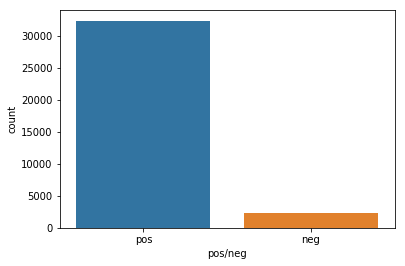

In [21]:
sns.countplot(df['pos/neg'], data = df)

In [22]:
cleanup_re = re.compile('[^a-z]+')
def clean_up(review):
    review = str(review)
    review = review.lower()
    review = cleanup_re.sub(' ', review).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return review

df["Clean"] = df["reviews.text"].apply(clean_up)
null["Clean"] = null["reviews.text"].apply(clean_up)

#Splitting the data (only 'Clean' and 'pos/neg' columns) into train and test data:

In [23]:
split = df[["Clean" , "pos/neg"]]
train=split.sample(frac=0.8,random_state=50)
test=split.drop(train.index)

In [24]:
train.head()

,Clean,pos/neg
21922,i bought this for my friends kid it works perf...,pos
22176,i have found alexa echo to be indispensable i ...,pos
16057,grandson plays outside with it love that it ha...,pos
21448,this is a great starter tablet for kids and ad...,pos
22773,we haven t opened ours up yet but a friend of ...,pos


In [25]:
test.head()

,Clean,pos/neg
5,this amazon fire inch tablet is the perfect si...,pos
7,i gave this as a christmas gift to my inlaws h...,pos
8,great as a device to read books i like that it...,pos
9,i love ordering books and reading them with th...,pos
15,the kindle is easiest to use graphics and scre...,pos


# Feature Extracter for NLTK Naive bayes classifier

In [26]:
def word_feats(words):
    features = {}
    for word in words:
        features [word] = True
    return features

In [27]:
train["words"] = train["Clean"].str.lower().str.split()
test["words"] = test["Clean"].str.lower().str.split()
null["words"] = null["Clean"].str.lower().str.split()

train.index = range(train.shape[0])
test.index = range(test.shape[0])
null.index = range(null.shape[0])
prediction =  {}                     # For storing results of different classifiers

train_naive = []
test_naive = []
null_naive = []

for i in range(train.shape[0]):
    train_naive = train_naive +[[word_feats(train["words"][i]) , train["pos/neg"][i]]]
for i in range(test.shape[0]):
    test_naive = test_naive +[[word_feats(test["words"][i]) , test["pos/neg"][i]]]
for i in range(null.shape[0]):
    null_naive = null_naive +[word_feats(null["words"][i])]

classifier = NaiveBayesClassifier.train(train_naive)
print("NLTK Naive bayes Accuracy : {}".format(nltk.classify.util.accuracy(classifier , test_naive)))
classifier.show_most_informative_features(5)

NLTK Naive bayes Accuracy : 0.596101083032491
Most Informative Features
                  poorly = True              neg : pos    =     70.0 : 1.0
               attempted = True              neg : pos    =     60.7 : 1.0
                 deleted = True              neg : pos    =     51.3 : 1.0
              lackluster = True              neg : pos    =     42.0 : 1.0
                decently = True              neg : pos    =     42.0 : 1.0


# Predicting result of nltk classifier

In [28]:
y =[]
only_words= [test_naive[i][0] for i in range(test.shape[0])]
for i in range(test.shape[0]):
    y = y + [classifier.classify(only_words[i])]
prediction["Naive"]= np.asarray(y)

y1 = []
for i in range(null.shape[0]):
    y1 = y1 + [classifier.classify(null_naive[i])]

null["Naive"] = y1

In [29]:
stop_words = set(stopwords.words('english'))
stop_words.remove("not")

count_vect = CountVectorizer(min_df=2 , stop_words=stop_words , ngram_range=(1,2))
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(train["Clean"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_new_counts = count_vect.transform(test["Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)

checkcounts = count_vect.transform(null["Clean"])
null_tfidf = tfidf_transformer.transform(checkcounts)

# Fitting Multinomial NB

In [30]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train_tfidf , train["pos/neg"])
prediction["MultinomialNB"] = model1.predict_proba(X_test_tfidf)[:,1]
print("Multinomial Accuracy : {}".format(model1.score(X_test_tfidf , test["pos/neg"])))

null["multi"] = model1.predict(null_tfidf)

Multinomial Accuracy : 0.9327075812274368


# Fitiing Bernouli NB

In [55]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB().fit(X_train_tfidf, train["pos/neg"])
prediction['BernoulliNB'] = model2.predict_proba(X_test_tfidf)[:,1]
print("Bernoulli Accuracy : {}".format(model2.score(X_test_tfidf , test["pos/neg"])))

null["Bill"] = model2.predict(null_tfidf)

Bernoulli Accuracy : 0.9218772563176896


# Fitiing LogisticRegression

In [32]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)
logistic = logreg.fit(X_train_tfidf, train["pos/neg"])
prediction['LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:,1]
print("Logistic Regression Accuracy : {}".format(logreg.score(X_test_tfidf , test["pos/neg"])))

null["log"] = logreg.predict(null_tfidf)

Logistic Regression Accuracy : 0.9373285198555956


# Getting most occuring words in train set

In [33]:
words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logistic.coef_[0])),
    columns = ['feature', 'coef'])
feature_coefs.sort_values(by="coef")

,feature,coef
43337,terrible,-23.926422
25188,love definitely,-23.602749
39563,slow,-21.283460
36918,returning,-20.978637
38656,setup echo,-20.191205
18736,great pictures,-19.734024
33107,price awesome,-18.632944
42544,tablet parents,-17.733764
46735,using firestick,-17.250658
33121,price bought,-17.214045


# Lets find out which classifier is doing what

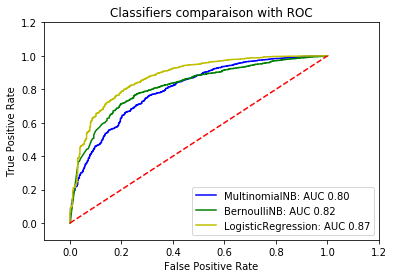

In [34]:
def formatt(x):
    if x == 'neg':
        return 0
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['b', 'g', 'y', 'm', 'k']
for model, predicted in prediction.items():
    if model not in 'Naive':
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test["pos/neg"].map(vfunc), predicted)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Let's see precision and recall of different classifiers

In [37]:
test.pos_neg = test['pos/neg'].replace(["pos" , "neg"] , [True , False] )

F:\Python\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [46]:
keys = prediction.keys()
for key in ['Multinomial', 'Bernoulli', 'LogisticRegression']:
    print(" {}:".format(key))
    print(metrics.classification_report(test["pos/neg"], prediction.get(key)>0.5, target_names = ["positive", "negative"]))
    print("\n")

 Multinomial:


TypeError: '>' not supported between instances of 'NoneType' and 'float'

In [56]:
def test_sample(model, sample):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))

test_sample(logreg, "The product was good and easy to  use")
test_sample(logreg, "the whole experience was horrible and product is worst")
test_sample(logreg, "product is not good")

Sample estimated as POS: negative prob 0.000000, positive prob 1.000000
Sample estimated as NEG: negative prob 0.992190, positive prob 0.007810
Sample estimated as NEG: negative prob 0.955710, positive prob 0.044290


In [57]:
null.head(10)

,reviews.rating,reviews.text,reviews.title,reviews.username,Clean,words,Naive,multi,Bill,log
0,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley,the kindle is my first e ink reader i own an i...,"[the, kindle, is, my, first, e, ink, reader, i...",neg,pos,neg,pos
1,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen,i m a first time kindle owner so i have nothin...,"[i, m, a, first, time, kindle, owner, so, i, h...",neg,pos,neg,pos
2,NaN,UPDATE NOVEMBER 2011:My review is now over a y...,Kindle vs. Nook (updated),Ron Cronovich,update november my review is now over a year o...,"[update, november, my, review, is, now, over, ...",neg,pos,neg,pos
3,NaN,"I'm a first-time Kindle owner, so I have nothi...","I Wanted a Dedicated E-Reader, and That's What...",Matthew Coenen,i m a first time kindle owner so i have nothin...,"[i, m, a, first, time, kindle, owner, so, i, h...",neg,pos,neg,pos
4,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton,i woke up to a nice surprise this morning a ne...,"[i, woke, up, to, a, nice, surprise, this, mor...",neg,pos,neg,pos
5,NaN,The Kindle is my first e-ink reader. I own an ...,"Worth the money. Not perfect, but very very go...",Jeffrey Stanley,the kindle is my first e ink reader i own an i...,"[the, kindle, is, my, first, e, ink, reader, i...",neg,pos,neg,pos
6,NaN,UPDATE NOVEMBER 2011:br /br /My review is now ...,Kindle vs. Nook (updated),Ron Cronovich,update november br br my review is now over a ...,"[update, november, br, br, my, review, is, now...",neg,pos,neg,pos
7,NaN,I woke up to a nice surprise this morning: a n...,"Not the perfect do-it-all device, but very clo...",C. Tipton,i woke up to a nice surprise this morning a ne...,"[i, woke, up, to, a, nice, surprise, this, mor...",neg,pos,neg,pos
8,NaN,I use to hate to read but now that I have my K...,Great,D. Tatro,i use to hate to read but now that i have my k...,"[i, use, to, hate, to, read, but, now, that, i...",pos,pos,pos,pos
9,NaN,All of them quit working. There's absolutely n...,I've had 3!,M. Lansford Kindle fave,all of them quit working there s absolutely no...,"[all, of, them, quit, working, there, s, absol...",neg,pos,pos,pos


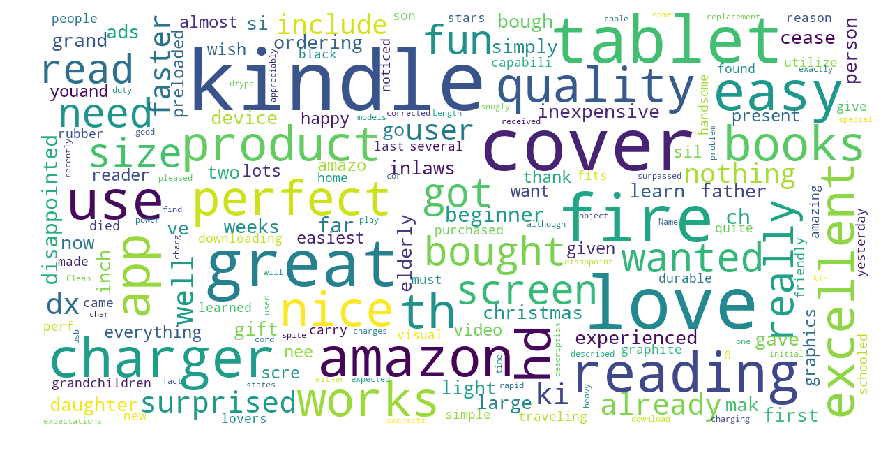

In [61]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


matplotlib.rcParams['font.size']=12          
matplotlib.rcParams['savefig.dpi']=100             
matplotlib.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df["Clean"])

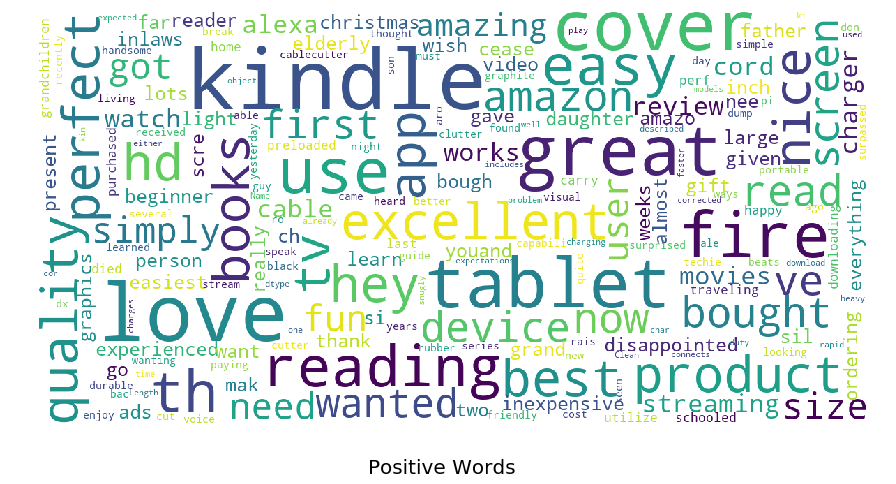

In [66]:
show_wordcloud(df["Clean"][df['pos/neg'] == "pos"] , title="Positive Words")

In [1]:
show_wordcloud(df["Clean"][df['pos/neg'] == "neg"] , title="Negative words")

NameError: name 'show_wordcloud' is not defined

In [3]:
jupyter --paths

NameError: name 'jupyter' is not defined